# Section: Federated Learning

# Lesson: Introducing Federated Learning

Federated Learning is a technique for training Deep Learning models on data to which you do not have access. Basically:

Federated Learning: Instead of bringing all the data to one machine and training a model, we bring the model to the data, train it locally, and merely upload "model updates" to a central server.

Use Cases:

    - app company (Texting prediction app)
    - predictive maintenance (automobiles / industrial engines)
    - wearable medical devices
    - ad blockers / autotomplete in browsers (Firefox/Brave)
    
Challenge Description: data is distributed amongst sources but we cannot aggregated it because of:

    - privacy concerns: legal, user discomfort, competitive dynamics
    - engineering: the bandwidth/storage requirements of aggregating the larger dataset

# Lesson: Introducing / Installing PySyft

In order to perform Federated Learning, we need to be able to use Deep Learning techniques on remote machines. This will require a new set of tools. Specifically, we will use an extensin of PyTorch called PySyft.

### Install PySyft

The easiest way to install the required libraries is with [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/overview.html). Create a new environment, then install the dependencies in that environment. In your terminal:

```bash
conda create -n pysyft python=3
conda activate pysyft # some older version of conda require "source activate pysyft" instead.
conda install jupyter notebook
pip install syft
pip install numpy
```

If you have any errors relating to zstd - run the following (if everything above installed fine then skip this step):

```
pip install --upgrade --force-reinstall zstd
```

and then retry installing syft (pip install syft).

If you are using Windows, I suggest installing [Anaconda and using the Anaconda Prompt](https://docs.anaconda.com/anaconda/user-guide/getting-started/) to work from the command line. 

With this environment activated and in the repo directory, launch Jupyter Notebook:

```bash
jupyter notebook
```

and re-open this notebook on the new Jupyter server.

If any part of this doesn't work for you (or any of the tests fail) - first check the [README](https://github.com/OpenMined/PySyft.git) for installation help and then open a Github Issue or ping the #beginner channel in our slack! [slack.openmined.org](http://slack.openmined.org/)

In [1]:
!pip install syft==0.2.9

     |████████████████████████████████| 433 kB 29.9 MB/s 
     |████████████████████████████████| 9.0 MB 36.4 MB/s 
     |████████████████████████████████| 66 kB 4.2 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 200 kB 45.0 MB/s 
     |████████████████████████████████| 753.4 MB 6.5 kB/s 
     |████████████████████████████████| 57 kB 6.1 MB/s 
     |████████████████████████████████| 484 kB 51.9 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 4.0 MB 49.2 MB/s 
     |████████████████████████████████| 449 kB 54.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 51.1 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 1.8 MB 51.8 MB/s 
     |████████████████████████████████| 126 kB 31.5 MB/s 
     |████████████████████████████████| 71 kB 9.3 MB/s 
     |███████████████████

In [1]:
import torch as th

In [2]:
x = th.tensor([1,2,3,4,5])
x

tensor([1, 2, 3, 4, 5])

In [3]:
y = x + x

In [4]:
print(y)

tensor([ 2,  4,  6,  8, 10])


In [5]:
import syft as sy

In [6]:
hook = sy.TorchHook(th)

In [7]:
th.tensor([1,2,3,4,5])

tensor([1, 2, 3, 4, 5])

# Lesson: Basic Remote Execution in PySyft

## PySyft => Remote PyTorch

The essence of Federated Learning is the ability to train models in parallel on a wide number of machines. Thus, we need the ability to tell remote machines to execute the operations required for Deep Learning.

Thus, instead of using Torch tensors - we're now going to work with **pointers** to tensors. Let me show you what I mean. First, let's create a "pretend" machine owned by a "pretend" person - we'll call him Bob.

In [8]:
bob = sy.VirtualWorker(hook, id="bob")

In [9]:
bob.clear_objects()

<VirtualWorker id:bob #objects:0>

In [10]:
bob._objects

{}

In [11]:
x = th.tensor([1,2,3,4,5])

In [12]:
x = x.send(bob)

In [13]:
bob._objects

{37021677417: tensor([1, 2, 3, 4, 5])}

In [14]:
x.location

<VirtualWorker id:bob #objects:1>

In [15]:
x.id_at_location

37021677417

In [16]:
x.id

33950258702

In [17]:
x.owner

<VirtualWorker id:me #objects:0>

In [18]:
hook.local_worker

<VirtualWorker id:me #objects:0>

In [19]:
x

(Wrapper)>[PointerTensor | me:33950258702 -> bob:37021677417]

In [20]:
x = x.get()
x

tensor([1, 2, 3, 4, 5])

In [21]:
bob._objects

{}

# Project: Playing with Remote Tensors

In this project, I want you to .send() and .get() a tensor to TWO workers by calling .send(bob,alice). This will first require the creation of another VirtualWorker called alice.

In [22]:
alice = sy.VirtualWorker(hook, id="alice")

In [23]:
x = th.tensor([1,2,3,4,5])

In [24]:
x_ptr = x.send(bob, alice)

In [25]:
x_ptr.get()

[tensor([1, 2, 3, 4, 5]), tensor([1, 2, 3, 4, 5])]

In [26]:
x = th.tensor([1,2,3,4,5]).send(bob, alice)

In [27]:
x.get(sum_results=True)

tensor([ 2,  4,  6,  8, 10])

In [28]:
bob._objects

{}

# Lesson: Introducing Remote Arithmetic

In [29]:
x = th.tensor([1,2,3,4,5]).send(bob)
y = th.tensor([1,1,1,1,1]).send(bob)

In [30]:
x

(Wrapper)>[PointerTensor | me:17105700949 -> bob:90972589524]

In [31]:
y

(Wrapper)>[PointerTensor | me:90393416665 -> bob:65699905206]

In [32]:
z = x + y

In [33]:
z

(Wrapper)>[PointerTensor | me:56441402508 -> bob:62336214775]

In [34]:
z = z.get()
z

tensor([2, 3, 4, 5, 6])

In [36]:
z = th.add(x,y)
z

(Wrapper)>[PointerTensor | me:45961739094 -> bob:75262930259]

In [37]:
z = z.get()
z

tensor([2, 3, 4, 5, 6])

In [38]:
x = th.tensor([1.,2,3,4,5], requires_grad=True).send(bob)
y = th.tensor([1.,1,1,1,1], requires_grad=True).send(bob)

In [39]:
z = (x + y).sum()

In [40]:
z.backward()

(Wrapper)>[PointerTensor | me:60705106184 -> bob:74522244695]

In [41]:
x = x.get()

In [42]:
x

tensor([1., 2., 3., 4., 5.], requires_grad=True)

In [43]:
x.grad

tensor([1., 1., 1., 1., 1.])

## Exercises: do an arithmetic operation on worker `alice` with a tensor of size 5 or above (with `requires_grad = True`). call `backward()` and print gradient afterwards.

# Project: Learn a Simple Linear Model

In this project, I'd like for you to create a simple linear model which will solve for the following dataset below. You should use only Variables and .backward() to do so (no optimizers or nn.Modules). Furthermore, you must do so with both the data and the model being located on Bob's machine.

In [44]:
sample_input = th.tensor([[1.,1],[0,1,],[1,0],[0,0]], requires_grad=True).send(bob)
target = th.tensor([[1.],[1],[0],[0]], requires_grad=True).send(bob)

In [45]:
weights = th.tensor([[0.],[0.]], requires_grad=True).send(bob)

In [46]:
sample_input.shape, target.shape, weights.shape

(torch.Size([4, 2]), torch.Size([4, 1]), torch.Size([2, 1]))

In [47]:
for i in range(10):

    pred = sample_input.mm(weights)

    loss = ((pred - target)**2).sum()

    loss.backward() #backpropagate 

    weights.data.sub_(weights.grad * 0.1) #update weights in-place
    weights.grad *= 0

    print(loss.get().data)

tensor(2.)
tensor(0.5600)
tensor(0.2432)
tensor(0.1372)
tensor(0.0849)
tensor(0.0538)
tensor(0.0344)
tensor(0.0220)
tensor(0.0141)
tensor(0.0090)


In [48]:
target.get()

tensor([[1.],
        [1.],
        [0.],
        [0.]], requires_grad=True)

In [49]:
bob._objects

{11480036556: tensor(20., grad_fn=<SumBackward0>),
 15878985318: tensor([[0.9997],
         [0.9328],
         [0.0670],
         [0.0000]], grad_fn=<MmBackward>),
 23279225954: tensor([1., 1., 1., 1., 1.], requires_grad=True),
 31803735444: tensor([[0.0536],
         [0.9463]], requires_grad=True),
 56038679586: tensor([[1., 1.],
         [0., 1.],
         [1., 0.],
         [0., 0.]], requires_grad=True),
 65699905206: tensor([1, 1, 1, 1, 1]),
 90972589524: tensor([1, 2, 3, 4, 5])}

# Lesson: Garbage Collection and Common Errors


In [50]:
bob = bob.clear_objects()

In [51]:
bob._objects

{}

In [52]:
x = th.tensor([1,2,3,4,5]).send(bob)

In [53]:
bob._objects

{40001865101: tensor([1, 2, 3, 4, 5])}

In [54]:
del x

In [55]:
bob._objects

{}

In [56]:
x = th.tensor([1,2,3,4,5]).send(bob)
x

(Wrapper)>[PointerTensor | me:14111254003 -> bob:42574423620]

In [57]:
bob._objects

{42574423620: tensor([1, 2, 3, 4, 5])}

In [58]:
x = "asdf"

In [59]:
bob._objects

{42574423620: tensor([1, 2, 3, 4, 5])}

In [60]:
x = th.tensor([1,2,3,4,5]).send(bob)
x

(Wrapper)>[PointerTensor | me:84989386114 -> bob:23623042215]

In [61]:
bob._objects

{23623042215: tensor([1, 2, 3, 4, 5]), 42574423620: tensor([1, 2, 3, 4, 5])}

In [62]:
x = "asdf"

In [63]:
bob._objects

{23623042215: tensor([1, 2, 3, 4, 5]), 42574423620: tensor([1, 2, 3, 4, 5])}

In [64]:
del x

In [65]:
bob._objects

{23623042215: tensor([1, 2, 3, 4, 5]), 42574423620: tensor([1, 2, 3, 4, 5])}

In [66]:
bob = bob.clear_objects()
bob._objects

{}

In [67]:
for i in range(1000):
    x = th.tensor([1,2,3,4,5]).send(bob)

In [68]:
bob._objects

{30244796699: tensor([1, 2, 3, 4, 5])}

In [78]:
x = th.tensor([1,2,3,4,5]).send(bob)
y = th.tensor([1,1,1,1,1])

In [79]:
x = x.get()

In [80]:
y

tensor([1, 1, 1, 1, 1])

In [81]:
z = x + y

In [82]:
z

tensor([2, 3, 4, 5, 6])

Make sure you compute the tensors of the same kind, not mix-n-match!
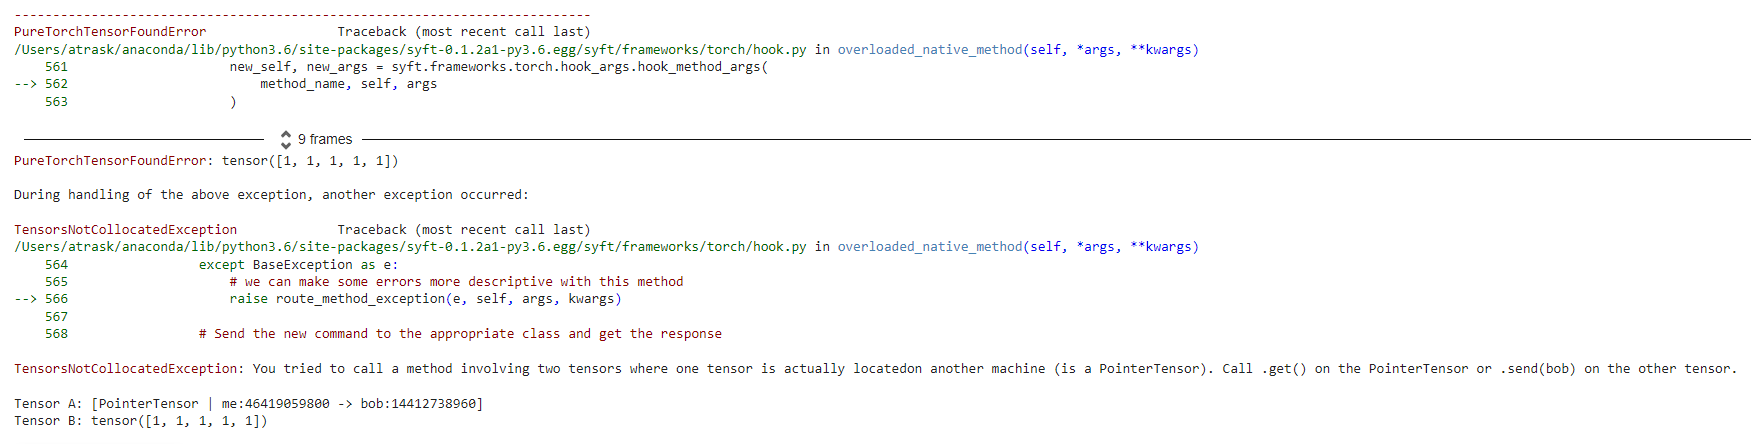

In [83]:
x = th.tensor([1,2,3,4,5]).send(bob)
y = th.tensor([1,1,1,1,1]).send(alice)

In [84]:
z = x + y

TensorsNotCollocatedException: ignored

<h2> You cannot compute 2 tensors from 2 different machines!

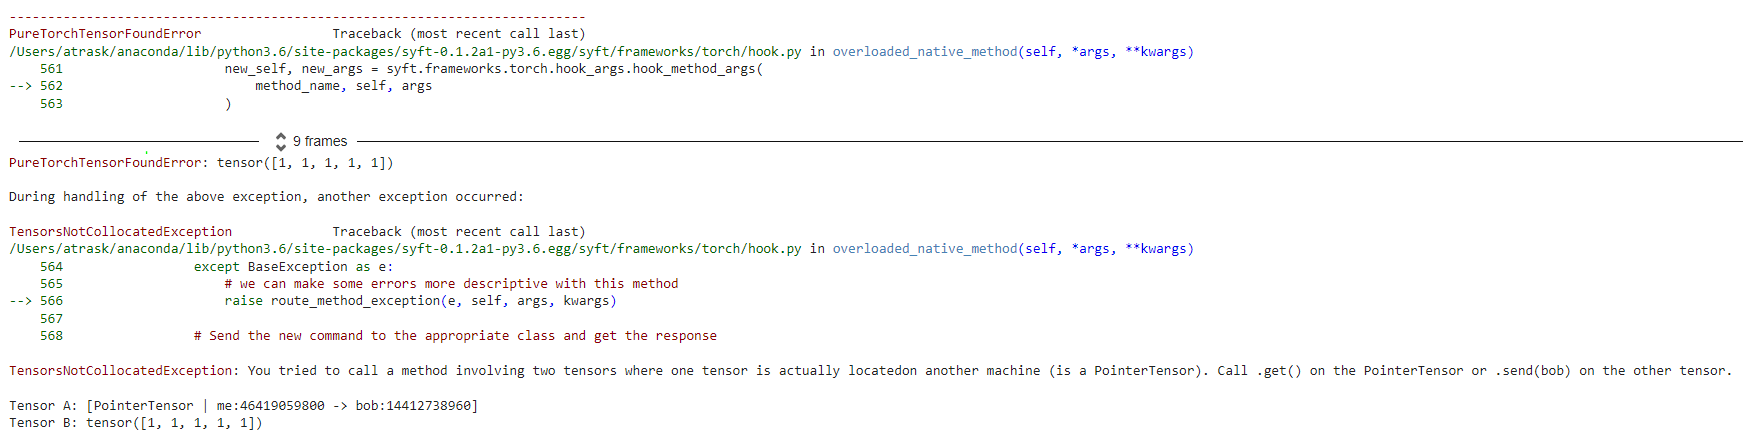

# Lesson: Toy Federated Learning

Let's start by training a toy model the centralized way. This is about a simple as models get. We first need:

- a toy dataset
- a model
- some basic training logic for training a model to fit the data.

In [85]:
from torch import nn, optim

In [86]:
alice.clear_objects()
bob.clear_objects()

<VirtualWorker id:bob #objects:0>

In [87]:
# A Toy Dataset
data = th.tensor([[1.,1],[0,1],[1,0],[0,0]], requires_grad=True)
target = th.tensor([[1.],[1], [0], [0]], requires_grad=True)

In [88]:
# A Toy Model
model = nn.Linear(2,1)

In [89]:
opt = optim.SGD(params=model.parameters(), lr=0.1)

In [90]:
def train(iterations=20):
    for iter in range(iterations):
        opt.zero_grad()

        pred = model(data)

        loss = ((pred - target)**2).sum()

        loss.backward()

        opt.step()

        print(loss.data)
        
train()

tensor(4.8935)
tensor(1.1825)
tensor(0.6100)
tensor(0.3794)
tensor(0.2420)
tensor(0.1548)
tensor(0.0991)
tensor(0.0634)
tensor(0.0406)
tensor(0.0260)
tensor(0.0166)
tensor(0.0107)
tensor(0.0068)
tensor(0.0044)
tensor(0.0028)
tensor(0.0018)
tensor(0.0011)
tensor(0.0007)
tensor(0.0005)
tensor(0.0003)


In [91]:
data_bob = data[0:2].send(bob)
target_bob = target[0:2].send(bob)

In [92]:
data_alice = data[2:4].send(alice)
target_alice = target[2:4].send(alice)

In [93]:
datasets = [(data_bob, target_bob), (data_alice, target_alice)]

In [94]:
def train(iterations=20):

    model = nn.Linear(2,1)
    opt = optim.SGD(params=model.parameters(), lr=0.1)
    
    for iter in range(iterations):

        for _data, _target in datasets:

            # send model to the data
            model = model.send(_data.location) #send the model to the location of the data (machine that owns it)

            # do normal training as in regular PyTorch code
            opt.zero_grad()
            pred = model(_data)
            loss = ((pred - _target)**2).sum()
            loss.backward()
            opt.step()

            # get smarter model back
            model = model.get()

            print(loss.get())

In [95]:
train()

tensor(0.0062, requires_grad=True)
tensor(0.1859, requires_grad=True)
tensor(0.0507, requires_grad=True)
tensor(0.1142, requires_grad=True)
tensor(0.0378, requires_grad=True)
tensor(0.0759, requires_grad=True)
tensor(0.0260, requires_grad=True)
tensor(0.0513, requires_grad=True)
tensor(0.0181, requires_grad=True)
tensor(0.0351, requires_grad=True)
tensor(0.0128, requires_grad=True)
tensor(0.0243, requires_grad=True)
tensor(0.0091, requires_grad=True)
tensor(0.0170, requires_grad=True)
tensor(0.0066, requires_grad=True)
tensor(0.0120, requires_grad=True)
tensor(0.0048, requires_grad=True)
tensor(0.0085, requires_grad=True)
tensor(0.0036, requires_grad=True)
tensor(0.0061, requires_grad=True)
tensor(0.0026, requires_grad=True)
tensor(0.0044, requires_grad=True)
tensor(0.0020, requires_grad=True)
tensor(0.0032, requires_grad=True)
tensor(0.0015, requires_grad=True)
tensor(0.0023, requires_grad=True)
tensor(0.0011, requires_grad=True)
tensor(0.0017, requires_grad=True)
tensor(0.0008, requi

In [ ]:
'''
This is incomplete Federated Learning example because we send a model to multiple clients, 
Solution: Keep their own model and Average them later. 
>>> Allows Plausible Deniability, we don't know who did what and what exactly that they modified.
'''

# Lesson: Advanced Remote Execution Tools

In the last section we trained a toy model using Federated Learning. We did this by calling .send() and .get() on our model, sending it to the location of training data, updating it, and then bringing it back. However, at the end of the example we realized that we needed to go a bit further to protect people privacy. Namely, we want to average the gradients BEFORE calling .get(). That way, we won't ever see anyone's exact gradient (thus better protecting their privacy!!!)

But, in order to do this, we need a few more pieces:

- use a pointer to send a Tensor directly to another worker

And in addition, while we're here, we're going to learn about a few more advanced tensor operations as well which will help us both with this example and a few in the future!

In [96]:
bob.clear_objects()
alice.clear_objects()

<VirtualWorker id:alice #objects:0>

In [97]:
x = th.tensor([1,2,3,4,5]).send(bob)

In [98]:
x = x.send(alice)

In [99]:
bob._objects

{95134800721: tensor([1, 2, 3, 4, 5])}

In [100]:
alice._objects

{90445474378: (Wrapper)>[PointerTensor | alice:90445474378 -> bob:95134800721]}

In [101]:
y = x + x

In [102]:
y

(Wrapper)>[PointerTensor | me:28740939684 -> alice:53485425025]

In [103]:
bob._objects

{52381628436: tensor([ 2,  4,  6,  8, 10]),
 95134800721: tensor([1, 2, 3, 4, 5])}

In [104]:
alice._objects

{53485425025: (Wrapper)>[PointerTensor | alice:53485425025 -> bob:52381628436],
 90445474378: (Wrapper)>[PointerTensor | alice:90445474378 -> bob:95134800721]}

In [105]:
jon = sy.VirtualWorker(hook, id="jon")

In [106]:
x = th.tensor([1,2,3,4,5]).send(bob).send(alice)
y = th.tensor([1,2,3,4,5]).send(bob).send(jon)


In [107]:
z = x+y

TensorsNotCollocatedException: ignored

In [108]:
bob.clear_objects()
alice.clear_objects()

x = th.tensor([1,2,3,4,5]).send(bob).send(alice)

In [109]:
bob._objects

{18233683595: tensor([1, 2, 3, 4, 5])}

In [110]:
alice._objects

{32731457958: (Wrapper)>[PointerTensor | alice:32731457958 -> bob:18233683595]}

In [111]:
x = x.get()
x

(Wrapper)>[PointerTensor | me:32731457958 -> bob:18233683595]

In [112]:
bob._objects

{18233683595: tensor([1, 2, 3, 4, 5])}

In [113]:
alice._objects

{}

In [114]:
x = x.get()
x

tensor([1, 2, 3, 4, 5])

In [115]:
bob._objects

{}

In [116]:
bob.clear_objects()
alice.clear_objects()

x = th.tensor([1,2,3,4,5]).send(bob).send(alice)

In [117]:
bob._objects

{79936339370: tensor([1, 2, 3, 4, 5])}

In [118]:
alice._objects

{49967871036: (Wrapper)>[PointerTensor | alice:49967871036 -> bob:79936339370]}

In [119]:
del x

In [120]:
bob._objects

{}

In [121]:
alice._objects

{}

# Lesson: Pointer Chain Operations

In [122]:
bob.clear_objects()
alice.clear_objects()

<VirtualWorker id:alice #objects:0>

In [123]:
x = th.tensor([1,2,3,4,5]).send(bob)

In [124]:
bob._objects

{43402665895: tensor([1, 2, 3, 4, 5])}

In [125]:
alice._objects

{}

In [126]:
x.move(alice)

(Wrapper)>[PointerTensor | me:91510105081 -> alice:43402665895]

In [127]:
bob._objects

{}

In [128]:
alice._objects

{43402665895: tensor([1, 2, 3, 4, 5])}

# Exercise: train a neural network in Federated Learning fashion using the MNIST dataset by `move` the model to each data location as in the toy dataset above and train them locally to that data owner.

Use one of the 2 model architectures and 2 loss functions that fit them appropriately.



*   Sum of Squared Error on FC layer or 
*   NLL loss on `log_softmax` layer.



**Bonus**: To better protect the model privacy, instead of using `move` on the global model, 


1.   Create 1 virtual worker (secure worker) which will receive the **local** models from the workers.
2.   Average all the weights and biases from each layer in the model
(Hint: if your model contains 2 layers, take all those layers into the calculation in terms of `weights` and `bias`.)

Hint snippet: 



```
with torch.no_grad():

      global_model.fc1.weight.set_(((alice_model.fc1.weight.data + bob_model.fc1.weight.data) / 2).get())

      global_model.fc1.bias.set_(((alice_model.fc1.bias.data + bob_model.fc1.bias.data) / 2).get())
```





In [1]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import syft as sy #import this last before syft modifies the library


In [2]:
hook = sy.TorchHook(torch)

In [3]:
alice = sy.VirtualWorker(hook, id="alice")
bob = sy.VirtualWorker(hook, id="bob")

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, )),
])

train_set = datasets.MNIST(
    "~/.pytorch/MNIST_data/", train=True, download=True, transform=transform)
test_set = datasets.MNIST(
    "~/.pytorch/MNIST_data/", train=False, download=True, transform=transform)
train_set_small = torch.utils.data.Subset(train_set, range(0, 640)) #increase if you want your model to be more accurate, if you try to debug, use a small one first to avoid computation limit
test_set_small = torch.utils.data.Subset(test_set, range(0, 640))

federated_train_loader = sy.FederatedDataLoader(
    train_set_small.federate((alice, bob)), batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_set_small, batch_size=64, shuffle=True)

In [60]:
import torch.optim as optim

def one_hot_of(index_tensor):
        """
        Transform to one hot tensor
        
        Example:
            [0, 3, 9]
            =>
            [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]
            
        """
        onehot_tensor = torch.zeros(*index_tensor.shape, 10) # 10 classes for MNIST
        onehot_tensor = onehot_tensor.scatter(1, index_tensor.view(-1, 1), 1)
        return onehot_tensor

In [90]:
class Model(nn.Module): #returns FC layer on forward(self, x)
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model2(nn.Module): #returns log_softmax layer on forward(self, x)
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Model()

optimizer = optim.SGD(model.parameters(), lr=0.00003)
optimizer = optimizer.fix_precision() 


In [91]:
for epoch in range(0, 5):
    model.train()
    for batch_idx, (data, target) in enumerate(federated_train_loader):
        # send the model to the client device where the data is present
        model.send(data.location)

        # training the model
        #zero grad
        optimizer.zero_grad()
        #convert labels to onehot_target using one_hot_of
        onehot_target = one_hot_of(target.get())
        #send onehot_target to local worker
        local_target = onehot_target.send(data.location)
        #do predictions on data
        output = model(data)
        #calculate loss based on output and onehot vector using SSE loss = (sum of diff) ** 2/batch_size
        loss = ((output - local_target)**2).sum()/64

        #do backpropagation
        loss.backward()
        #optimizer step
        optimizer.step()

        # get back the improved model
        model.get()
        if batch_idx % 100 == 0:
            # get back the loss
            loss = loss.get()
            print('Epoch: {:2d} [{:5d}/{:5d} ({:3.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                batch_idx * 64,
                len(federated_train_loader) * 64,
                100. * batch_idx / len(federated_train_loader),
                loss.item()))

Epoch:  1 [    0/  640 (  0%)]	Loss: 1.086621
Epoch:  2 [    0/  640 (  0%)]	Loss: 1.084376
Epoch:  3 [    0/  640 (  0%)]	Loss: 1.080011
Epoch:  4 [    0/  640 (  0%)]	Loss: 1.080568
Epoch:  5 [    0/  640 (  0%)]	Loss: 1.109118


If you do it right, the loss will decrease after every epoch 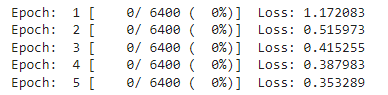

## Bonus Section: Secure Third Party

In [ ]:
secure_worker = sy.VirtualWorker(hook, id="secure_worker") #for bonus task only


In [ ]:
global_model = Model() #initialize first model with random weights

In [ ]:
from tqdm.notebook import tqdm
for epoch in tqdm(range(10)):
    bob_model = global_model.copy().send(bob)
    alice_model = global_model.copy().send(alice)
    #define optimizer SGD for each model

    #
    for batch_idx, (data, target) in tqdm(enumerate(federated_train_loader), total = len(federated_train_loader)):
        onehot_target = one_hot_of(target.copy().get())
        
        if data.location.id == 'bob':
          local_target = ... .send(bob)
          # Train Bob's Model

          #zero grad
          ....zero_grad()
          #prediction
          bobs_pred = bob_model(data)
          batch_size = bobs_pred.shape[0]
          #calculate loss and gradients
          bobs_loss = ...
          bobs_loss.backward()
          ....step()
          #get loss for averaging
          bobs_loss = bobs_loss.get().data
        elif data.location.id == 'alice':
          local_target = ... .send(alice)
         # Train Alice's Model
          ....zero_grad()
          alices_pred = alice_model(data)
          batch_size = alices_pred.shape[0]

          alices_loss = ...

          alices_loss.backward()

          ....step()
          alices_loss = alices_loss.get().data
    #move both models to secure worker
    # 2lines
    
    with torch.no_grad():
        #weight averaging here

    print("Epoch " + str(epoch) + ": Bob:" + str(bobs_loss) + " Alice:" + str(alices_loss))
    # break

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0: Bob:tensor(0.9070) Alice:tensor(0.9307)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1: Bob:tensor(0.8772) Alice:tensor(0.8799)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2: Bob:tensor(0.8307) Alice:tensor(0.8621)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 3: Bob:tensor(0.8225) Alice:tensor(0.8023)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4: Bob:tensor(0.7809) Alice:tensor(0.7667)


Each model trains independently and improves (via loss decrease), the global model benefits.

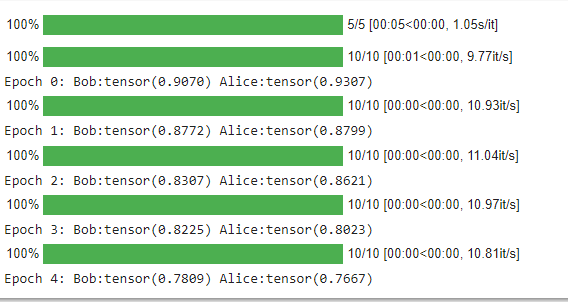

In [ ]:
import time
def test(model, private_test_loader):
    test_loss = 0
    correct = 0
    # print(model.location)

    model.eval()
    with torch.no_grad():
        for data, target in private_test_loader:
            start_time = time.time()
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum()
    accuracy =  100. * correct.item() / (len(private_test_loader) * 64)
    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct.item(), len(private_test_loader)* 64,
       accuracy))
    return accuracy

In [ ]:
test(global_model, test_loader), test(alice_model.copy().get(), test_loader), test(bob_model.copy().get(), test_loader)